In [1]:
import pyconfig

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme="onedork")

In [3]:
url = "https://opendata.arcgis.com/api/v3/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/downloads/data?format=csv&spatialRefId=4326"

In [4]:
df_raw = pd.read_csv(url)
df_raw = df_raw.drop([c for c in df_raw.columns if "Id" in c], 1)
df_raw

,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00+00,0,1,0,Nicht übermittelt
1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00+00,0,1,0,Nicht übermittelt
2,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00+00,0,1,0,Nicht übermittelt
3,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/20 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00+00,0,1,1,Nicht übermittelt
4,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/23 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00+00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699740,Thüringen,LK Altenburger Land,A60-A79,W,1,0,2020/11/20 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/11/16 00:00:00+00,0,1,1,Nicht übermittelt
1699741,Thüringen,LK Altenburger Land,A60-A79,W,9,0,2020/11/20 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/11/20 00:00:00+00,0,9,0,Nicht übermittelt
1699742,Thüringen,LK Altenburger Land,A60-A79,W,1,0,2020/11/21 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/11/15 00:00:00+00,0,1,1,Nicht übermittelt
1699743,Thüringen,LK Altenburger Land,A60-A79,W,1,0,2020/11/21 00:00:00+00,"19.04.2021, 00:00 Uhr",0,-9,2020/11/21 00:00:00+00,0,1,0,Nicht übermittelt


In [5]:
df_raw.iloc[:,6] = pd.to_datetime(df_raw.iloc[:,6])

In [6]:
region = df_raw.columns[0]
time = df_raw.columns[6]

In [7]:
df_raw.loc[:,time].min(), df_raw.loc[:,time].max()

(Timestamp('2020-01-07 00:00:00+0000', tz='UTC'),
 Timestamp('2021-04-18 00:00:00+0000', tz='UTC'))

In [8]:
df = df_raw.groupby(region).sum()
df

,AnzahlFall,AnzahlTodesfall,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn
Bundesland,,,,,,,
Baden-Württemberg,407581,9063,646,-2044302,-206073,360825,172283
Bayern,556133,13738,1011,-2682581,-286416,493693,190821
Berlin,159248,3148,114,-735058,-60984,145768,62047
Brandenburg,96896,3453,143,-536009,-60566,85679,44313
Bremen,23532,435,28,-92232,-9679,20261,6949
Hamburg,68238,1431,37,-198630,-23753,58870,19328
Hessen,244202,6610,260,-1119989,-117710,214583,90148
Mecklenburg-Vorpommern,36332,927,124,-204911,-27105,31506,17559
Niedersachsen,221877,5125,431,-1163365,-109484,199136,96617


In [9]:
def random_split(n_elements, group_names):
    if isinstance(group_names, int):
        group_names = set(range(group_names))
    assert len(group_names)<n_elements
    while True:
        split = random.choices(population=list(group_names), k=n_elements)
        if len(set(split))==len(group_names):
            return split


def single_changes(split):
    group_names = set(split)
    for ix,group_name in enumerate(split):
        for new_group_name in group_names - {group_name}:
            split[ix] = new_group_name
            if len(set(split)) == len(group_names):
                yield split.copy()
        split[ix] = group_name


def split_approx(df_features, group_names, metric):
    split = random_split(len(df_features), group_names)
    while True:
        new_splits = list(single_changes(split))
        new_metrics = [metric(new_split, df_features) for new_split in new_splits]
        if min(new_metrics)>=metric(split, df_features):
            return split
        split = new_splits[new_metrics.index(min(new_metrics))]

In [10]:
def calc_split_metric(split, df):
    df3 = df.groupby(split).sum()
    df3 /= df3.sum()
    return (df3.max() - df3.min()).sum()

In [11]:
group_col = "group"
assert group_col not in df.columns
df[group_col] = split_approx(df, 3, calc_split_metric)
df.groupby(group_col).sum()

,AnzahlFall,AnzahlTodesfall,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn
group,,,,,,,
0,1052365,26158,1873,-5046444,-542435,933179,372048
1,1068930,26109,1604,-4788369,-489441,944439,394073
2,1032279,27738,1714,-4870286,-548298,909468,411235


In [12]:
df

,AnzahlFall,AnzahlTodesfall,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,group
Bundesland,,,,,,,,
Baden-Württemberg,407581,9063,646,-2044302,-206073,360825,172283,2
Bayern,556133,13738,1011,-2682581,-286416,493693,190821,0
Berlin,159248,3148,114,-735058,-60984,145768,62047,0
Brandenburg,96896,3453,143,-536009,-60566,85679,44313,2
Bremen,23532,435,28,-92232,-9679,20261,6949,2
Hamburg,68238,1431,37,-198630,-23753,58870,19328,0
Hessen,244202,6610,260,-1119989,-117710,214583,90148,1
Mecklenburg-Vorpommern,36332,927,124,-204911,-27105,31506,17559,2
Niedersachsen,221877,5125,431,-1163365,-109484,199136,96617,2


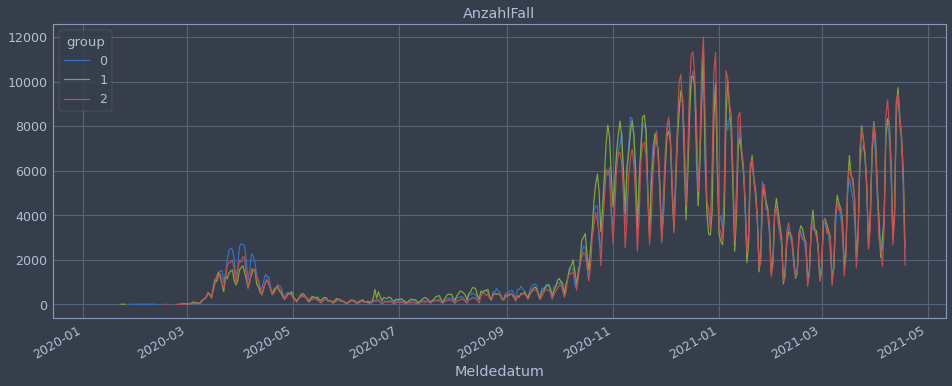

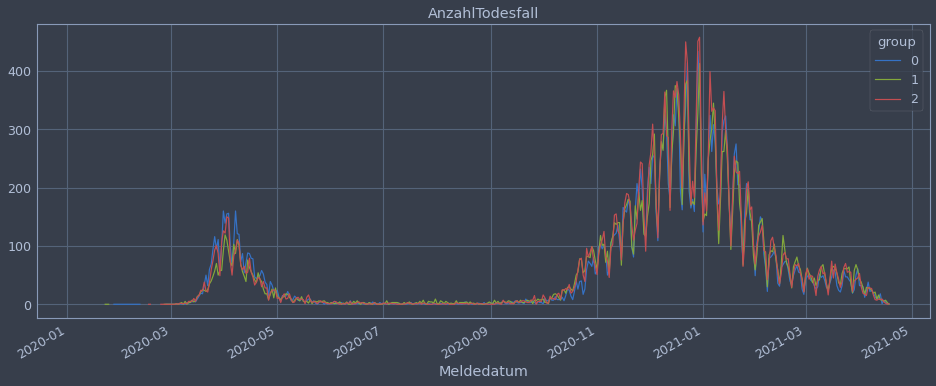

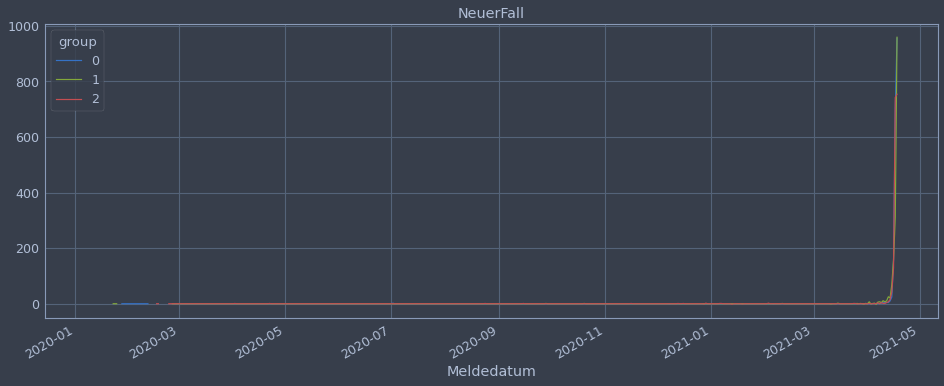

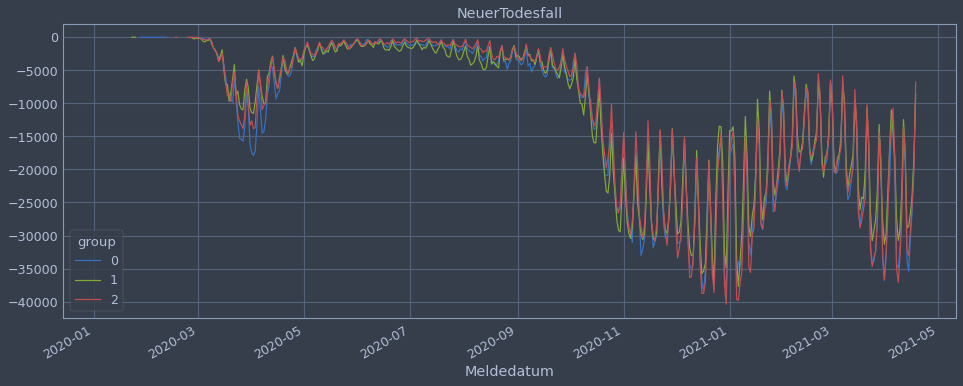

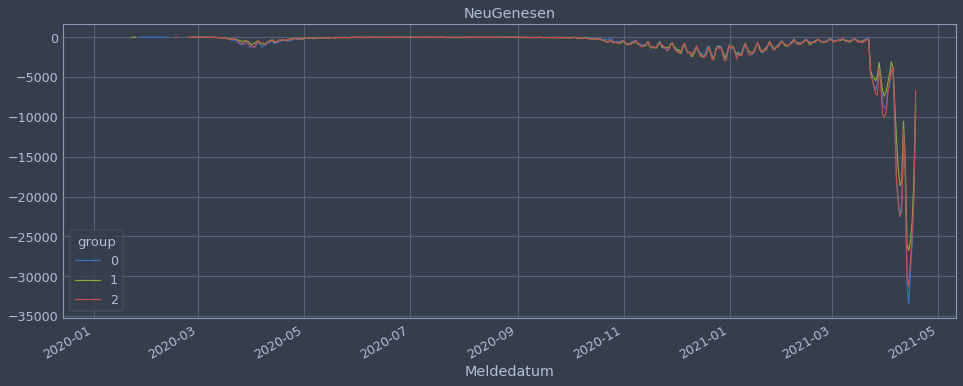

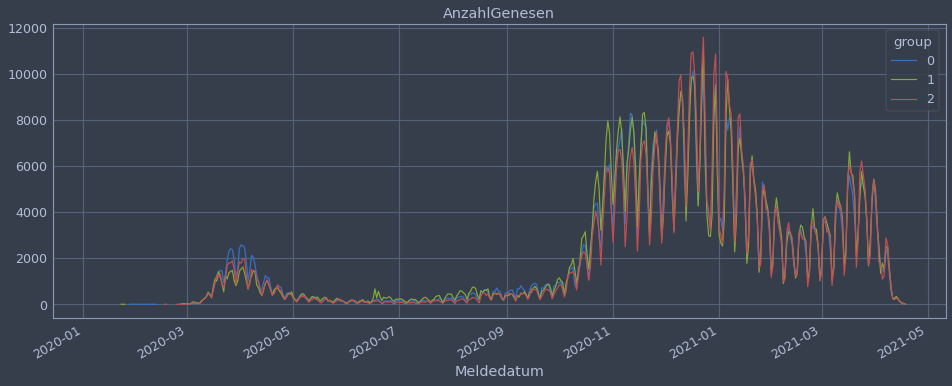

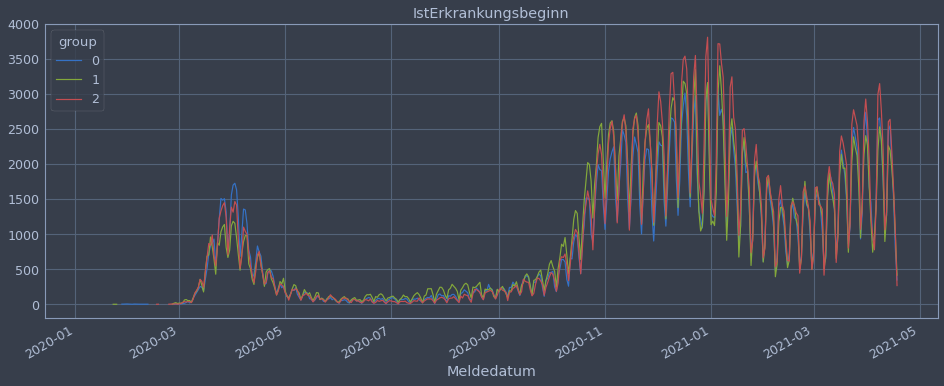

In [15]:
df_eval = df_raw.join(df.group, on=region).groupby([group_col, time]).sum()
for col in df_eval.columns:
    df_eval[col].unstack(group_col).plot(figsize=(16,6))
    plt.title(col)
    plt.show()